<a href="https://colab.research.google.com/github/nadiataoufik/Census_income-/blob/master/ED_PATIENTS_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
#2018-06-16 00:00:00    27.524297
#2018-06-16 01:00:00    26.442883
#2018-06-16 02:00:00    23.595677
#2018-06-16 03:00:00    19.609593
import pandas as pd 
df=pd.read_excel(r"C:\Users\Ntaoufi\Documents\ED_Cencus.xlsx")
df.columns

Index(['Date', 'Hour', 'Total_Ed_Patients', 'MaxAdmitWaitTime',
       'MinMinutesToEta', 'HU_Patients', 'MinFromResGr40', 'OneToOnePatients',
       'EDHolds', 'EDLocRed', 'EDLocBlue', 'EDLocGreen', 'EDLocGold',
       'EDLocPeds', 'EDLocMinor', 'EDLocOth', 'EDStaffRN', 'EDStaffPCA',
       'EDStaffCSS', 'EDStaffTrans', 'EDStaffOther', 'Total_Adm_Patients',
       'AvgDoor2Doc', 'AvgDoor2Rm', 'Total_Ed_Patients_Bud',
       'Total_Ed_Nurse_Bud', 'Total_Ed_PCA_Bud', 'Max_WR_Time',
       'AvgConv2BedAssign', 'Nurse_Ratio_Bud', 'PCA_Ratio_Bud', 'AdmBedReq',
       'Minute', 'ArrivedLast30Minutes'],
      dtype='object')

In [ ]:
df=df.drop(['MaxAdmitWaitTime',
       'MinMinutesToEta', 'HU_Patients', 'MinFromResGr40', 'OneToOnePatients',
       'EDHolds', 'EDLocRed', 'EDLocBlue', 'EDLocGreen', 'EDLocGold',
       'EDLocPeds', 'EDLocMinor', 'EDLocOth', 'EDStaffRN', 'EDStaffPCA',
       'EDStaffCSS', 'EDStaffTrans', 'EDStaffOther', 'Total_Adm_Patients',
       'AvgDoor2Doc', 'AvgDoor2Rm', 'Total_Ed_Patients_Bud',
       'Total_Ed_Nurse_Bud', 'Total_Ed_PCA_Bud', 'Max_WR_Time',
       'AvgConv2BedAssign', 'Nurse_Ratio_Bud', 'PCA_Ratio_Bud', 'AdmBedReq', 'ArrivedLast30Minutes'],axis=1)

In [ ]:
df=df.dropna()
df.head()

,Date,Hour,Total_Ed_Patients,Minute
0,2018-06-08,15,44,0
1,2018-06-08,16,50,0
2,2018-06-08,17,54,0
3,2018-06-08,18,58,0
4,2018-06-08,19,64,0


In [ ]:
df["day"] = df['Date'].map(lambda x: x.day)
df["month"] = df['Date'].map(lambda x: x.month)
df["year"] = df['Date'].map(lambda x: x.year)

In [ ]:
df=df.drop('Date',axis=1)
df.head()

,Hour,Total_Ed_Patients,Minute,day,month,year
0,15,44,0,8,6,2018
1,16,50,0,8,6,2018
2,17,54,0,8,6,2018
3,18,58,0,8,6,2018
4,19,64,0,8,6,2018


In [ ]:
df['Date']=pd.to_datetime({'year':df['year'],'month':df['month'],'day':df['day'],'Hour':df['Hour'],'Minute':df['Minute']})

In [ ]:
df.head()

,Hour,Total_Ed_Patients,Minute,day,month,year,Date
0,15,44,0,8,6,2018,2018-06-08 15:00:00
1,16,50,0,8,6,2018,2018-06-08 16:00:00
2,17,54,0,8,6,2018,2018-06-08 17:00:00
3,18,58,0,8,6,2018,2018-06-08 18:00:00
4,19,64,0,8,6,2018,2018-06-08 19:00:00


In [ ]:
df= df.set_index('Date')
df.head()

,Hour,Total_Ed_Patients,Minute,day,month,year
Date,,,,,,
2018-06-08 15:00:00,15,44,0,8,6,2018
2018-06-08 16:00:00,16,50,0,8,6,2018
2018-06-08 17:00:00,17,54,0,8,6,2018
2018-06-08 18:00:00,18,58,0,8,6,2018
2018-06-08 19:00:00,19,64,0,8,6,2018


In [ ]:
df=df.asfreq('H')

<AxesSubplot:xlabel='Date'>

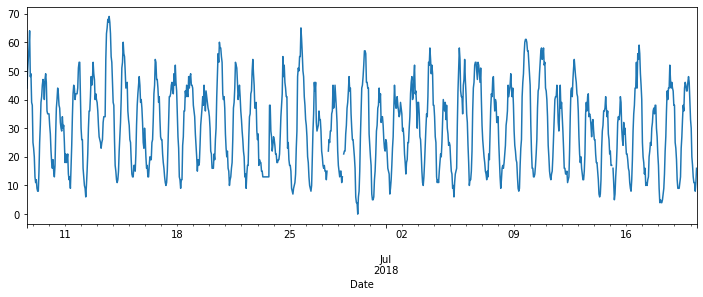

In [ ]:
df['Total_Ed_Patients'].plot(figsize=(12,4))

In [ ]:
df=df.head(201)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

<AxesSubplot:xlabel='Date'>

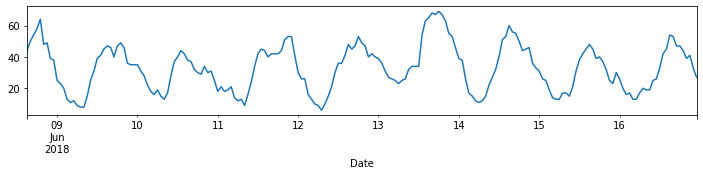

In [ ]:
results = seasonal_decompose(df['Total_Ed_Patients'])
results.observed.plot(figsize=(12,2))

<AxesSubplot:xlabel='Date'>

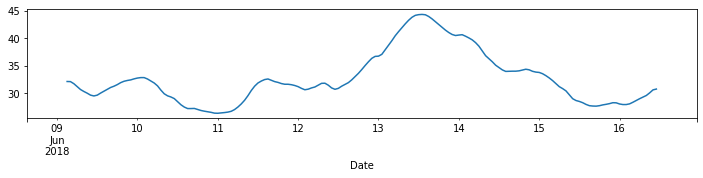

In [ ]:
results.trend.plot(figsize=(12,2))

<AxesSubplot:xlabel='Date'>

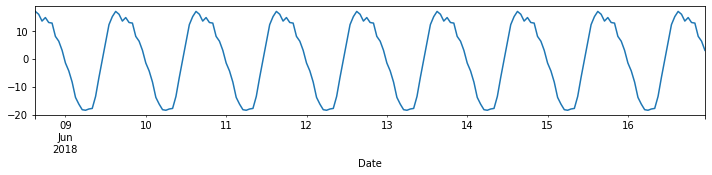

In [ ]:
results.seasonal.plot(figsize=(12,2))

<AxesSubplot:xlabel='Date'>

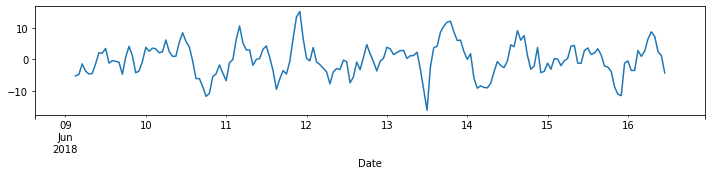

In [ ]:
results.resid.plot(figsize=(12,2))

In [ ]:
#train test split 
len(df)

201

In [ ]:
df.tail(24)

,Hour,Total_Ed_Patients,Minute,day,month,year
Date,,,,,,
2018-06-16 00:00:00,0.0,26.0,0.0,16.0,6.0,2018.0
2018-06-16 01:00:00,1.0,20.0,0.0,16.0,6.0,2018.0
2018-06-16 02:00:00,2.0,16.0,0.0,16.0,6.0,2018.0
2018-06-16 03:00:00,3.0,17.0,0.0,16.0,6.0,2018.0
2018-06-16 04:00:00,4.0,13.0,0.0,16.0,6.0,2018.0
2018-06-16 05:00:00,5.0,13.0,0.0,16.0,6.0,2018.0
2018-06-16 06:00:00,6.0,17.0,0.0,16.0,6.0,2018.0
2018-06-16 07:00:00,7.0,20.0,0.0,16.0,6.0,2018.0
2018-06-16 08:00:00,8.0,19.0,0.0,16.0,6.0,2018.0


In [ ]:
df1=df[['Total_Ed_Patients']]
df1.head()

,Total_Ed_Patients
Date,
2018-06-08 15:00:00,44.0
2018-06-08 16:00:00,50.0
2018-06-08 17:00:00,54.0
2018-06-08 18:00:00,58.0
2018-06-08 19:00:00,64.0


In [ ]:
train = df1.iloc[:177]
test = df1.iloc[177:]

In [ ]:
train

,Total_Ed_Patients
Date,
2018-06-08 15:00:00,44.0
2018-06-08 16:00:00,50.0
2018-06-08 17:00:00,54.0
2018-06-08 18:00:00,58.0
2018-06-08 19:00:00,64.0
...,...
2018-06-15 19:00:00,37.0
2018-06-15 20:00:00,32.0
2018-06-15 21:00:00,25.0


In [ ]:
len(test)

24

In [ ]:
#scaled the data 
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
#TIME SERIE GENERATOR 
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# Let's define the train generator  to get 24 hours back and then predict the next 4 hours out
n_input = 24
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y=generator[0]
print(X,y)

[[[0.6031746 ]
  [0.6984127 ]
  [0.76190476]
  [0.82539683]
  [0.92063492]
  [0.66666667]
  [0.68253968]
  [0.52380952]
  [0.50793651]
  [0.3015873 ]
  [0.26984127]
  [0.22222222]
  [0.11111111]
  [0.07936508]
  [0.0952381 ]
  [0.04761905]
  [0.03174603]
  [0.03174603]
  [0.14285714]
  [0.3015873 ]
  [0.3968254 ]
  [0.52380952]
  [0.55555556]
  [0.61904762]]] [[0.65079365]]


In [ ]:
scaled_train[:5]

array([[0.6031746 ],
       [0.6984127 ],
       [0.76190476],
       [0.82539683],
       [0.92063492]])

In [ ]:
len(generator)

153

In [ ]:
X.shape

(1, 24, 1)

In [ ]:
#Create the model 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
 #define model
n_features=1
n_input=24
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')## define model
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 150)               91200     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fit the model 
model.fit_generator(generator,epochs=50)

Epoch 1/50
153/153 [==============================] - 1s 9ms/step - loss: 0.0057
Epoch 2/50
153/153 [==============================] - 1s 8ms/step - loss: 0.0057
Epoch 3/50
153/153 [==============================] - 1s 9ms/step - loss: 0.0053
Epoch 4/50
153/153 [==============================] - 1s 9ms/step - loss: 0.0052
Epoch 5/50
153/153 [==============================] - 1s 9ms/step - loss: 0.0050
Epoch 6/50
153/153 [==============================] - 1s 8ms/step - loss: 0.0054
Epoch 7/50
153/153 [==============================] - 1s 9ms/step - loss: 0.0053
Epoch 8/50
153/153 [==============================] - 1s 9ms/step - loss: 0.0052
Epoch 9/50
153/153 [==============================] - 1s 9ms/step - loss: 0.0049
Epoch 10/50
153/153 [==============================] - 1s 9ms/step - loss: 0.0053
Epoch 11/50
153/153 [==============================] - 1s 9ms/step - loss: 0.0051
Epoch 12/50
153/153 [==============================] - 1s 9ms/step - loss: 0.0048
Epoch 13/50
153/153 [====

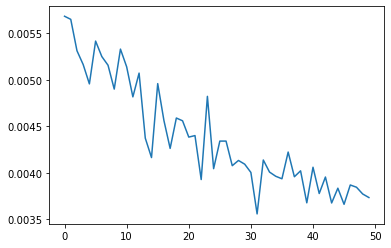

In [ ]:
import matplotlib.pyplot as plt
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
first_eval_batch = scaled_train[-24:] # last 24 hours

In [ ]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(first_eval_batch)

array([[0.3640685]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.31746032])

In [ ]:
#Now let's put this logic in a for loop to predict into the future for the entire test range.

test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [ ]:
current_batch.shape

(1, 24, 1)

In [ ]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.31746032],
        [ 0.3015873 ],
        [ 0.20634921],
        [ 0.12698413],
        [ 0.11111111],
        [ 0.11111111],
        [ 0.17460317],
        [ 0.17460317],
        [ 0.14285714],
        [ 0.23809524],
        [ 0.3968254 ],
        [ 0.50793651],
        [ 0.57142857],
        [ 0.61904762],
        [ 0.66666667],
        [ 0.61904762],
        [ 0.52380952],
        [ 0.53968254],
        [ 0.49206349],
        [ 0.41269841],
        [ 0.3015873 ],
        [ 0.26984127],
        [ 0.38095238],
        [99.        ]]])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

<AxesSubplot:xlabel='Date'>

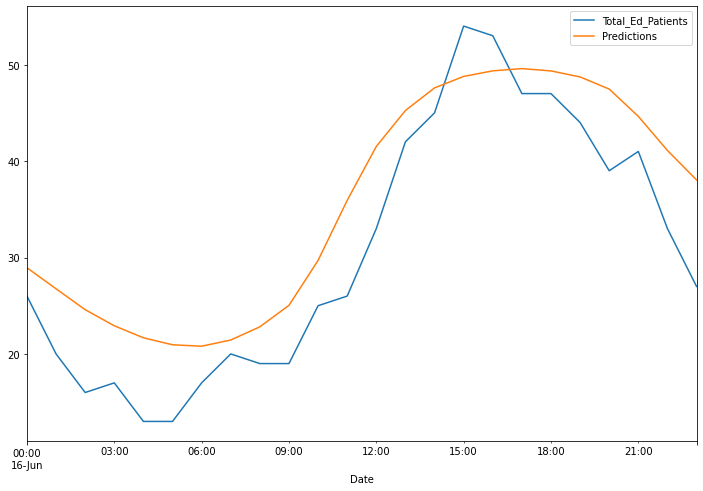

In [ ]:
#let s inverse the transformation and compare

true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions
test.plot(figsize=(12,8))

In [ ]:
from statsmodels.tools.eval_measures import rmse
error=rmse(test['Total_Ed_Patients'],test['Predictions'])
error

6.215257704938515

In [ ]:
test['Total_Ed_Patients'].mean()

30.666666666666668